# KNN Regression
Implementasi KNN Regression untuk forecasting data time series NO2 dengan lag 7.

1. Import Library
Import library yang diperlukan untuk KNN Regression, termasuk pandas untuk manipulasi data, numpy untuk operasi numerik, matplotlib dan seaborn untuk visualisasi, serta scikit-learn untuk modeling dan evaluasi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

2. Load Dataset Supervised
Load dataset supervised dengan lag 7 yang telah dipersiapkan sebelumnya. Dataset ini berisi nilai NO2 saat ini dan nilai-nilai lag (NO2 pada hari-hari sebelumnya).

In [2]:
df = pd.read_csv('dataset/supervised_data_lag_7.csv')
print("Shape dataset:", df.shape)
df.head()

Shape dataset: (376, 19)


,date,feature_index,NO2,NO2_lag_1,NO2_lag_2,NO2_lag_3,NO2_lag_4,NO2_lag_5,NO2_lag_6,NO2_lag_7,year,month,day,dayofweek,dayofyear,month_sin,month_cos,day_sin,day_cos
0,2022-12-13 00:00:00+00:00,0,0.000042,0.000033,0.000023,0.000052,0.000033,0.000032,0.000044,0.000028,2022,12,13,1,347,-2.449294e-16,1.000000e+00,0.485302,-0.874347
1,2022-12-14 00:00:00+00:00,0,0.000041,0.000042,0.000033,0.000023,0.000052,0.000033,0.000032,0.000044,2022,12,14,2,348,-2.449294e-16,1.000000e+00,0.299363,-0.954139
2,2022-12-15 00:00:00+00:00,0,0.000069,0.000041,0.000042,0.000033,0.000023,0.000052,0.000033,0.000032,2022,12,15,3,349,-2.449294e-16,1.000000e+00,0.101168,-0.994869
3,2023-02-25 00:00:00+00:00,0,0.000024,0.000034,0.000036,0.000029,0.000027,0.000047,0.000028,0.000030,2023,2,25,5,56,8.660254e-01,5.000000e-01,-0.937752,0.347305
4,2023-03-10 00:00:00+00:00,0,0.000033,0.000043,0.000042,0.000066,0.000035,0.000035,0.000015,0.000033,2023,3,10,4,69,1.000000e+00,6.123234e-17,0.897805,-0.440394


3. Explorasi Data
Melihat informasi dataset meliputi tipe data, deskripsi statistik, dan pengecekan missing values untuk memastikan kualitas data sebelum modeling.

In [3]:
# Informasi dataset
print("Info Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           376 non-null    object 
 1   feature_index  376 non-null    int64  
 2   NO2            376 non-null    float64
 3   NO2_lag_1      376 non-null    float64
 4   NO2_lag_2      376 non-null    float64
 5   NO2_lag_3      376 non-null    float64
 6   NO2_lag_4      376 non-null    float64
 7   NO2_lag_5      376 non-null    float64
 8   NO2_lag_6      376 non-null    float64
 9   NO2_lag_7      376 non-null    float64
 10  year           376 non-null    int64  
 11  month          376 non-null    int64  
 12  day            376 non-null    int64  
 13  dayofweek      376 non-null    int64  
 14  dayofyear      376 non-null    int64  
 15  month_sin      376 non-null    float64
 16  month_cos      376 non-null    float64
 17  day_sin        376 non-null    float64
 

4. Persiapan Data untuk Modeling
Identifikasi Kolom Dataset
Langkah pertama adalah mengidentifikasi kolom-kolom yang ada dalam dataset untuk menentukan mana yang akan menjadi target (variabel yang akan diprediksi) dan mana yang akan menjadi fitur (variabel prediktor).

In [4]:
print("Kolom dalam dataset:")
print(df.columns.tolist())

if 'NO2' in df.columns:
    target_col = 'NO2'
else:
    target_col = df.columns[-1]

print(f"\nKolom target: {target_col}")

Kolom dalam dataset:
['date', 'feature_index', 'NO2', 'NO2_lag_1', 'NO2_lag_2', 'NO2_lag_3', 'NO2_lag_4', 'NO2_lag_5', 'NO2_lag_6', 'NO2_lag_7', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'month_sin', 'month_cos', 'day_sin', 'day_cos']

Kolom target: NO2


Pemisahan Fitur dan Target
Pada tahap ini, kita memisahkan dataset menjadi:

Fitur (X): Variabel-variabel yang akan digunakan untuk prediksi (kolom lag)

Target (y): Variabel yang akan diprediksi (kolom NO2)

Beberapa kolom dihapus dari fitur karena:

Kolom ‘t’ (timestamp): Tidak dapat dinormalisasi dan tidak relevan untuk model

Kolom temporal (day, dayofweek, year, month, dayofyear): Fitur waktu yang redundan

Kolom siklik (month_sin, month_cos, day_sin, day_cos): Representasi siklik yang tidak diperlukan dalam konteks ini

Model akan fokus pada kolom-kolom lag yang merepresentasikan nilai NO2 di hari-hari sebelumnya.

In [6]:
X = df.drop(
    columns=[
        target_col,
        "date",
        "day",
        "dayofweek",
        "year",
        "month",
        "dayofyear",
        "month_sin",
        "month_cos",
        "day_sin",
        "day_cos",
    ]
)
y = df[target_col]

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nKolom fitur yang digunakan:")
print(X.columns.tolist())


Shape X: (376, 8)
Shape y: (376,)

Kolom fitur yang digunakan:
['feature_index', 'NO2_lag_1', 'NO2_lag_2', 'NO2_lag_3', 'NO2_lag_4', 'NO2_lag_5', 'NO2_lag_6', 'NO2_lag_7']


5. Split Data Train dan Test
Membagi data menjadi data training (80%) dan testing (20%). Gunakan shuffle=False untuk menjaga urutan waktu pada data time series.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

print("Shape data train:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nShape data test:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape data train:
X_train: (300, 8), y_train: (300,)

Shape data test:
X_test: (76, 8), y_test: (76,)


6. Normalisasi Data
Normalisasi data menggunakan StandardScaler agar semua fitur memiliki skala yang sama. KNN sangat sensitif terhadap skala data, sehingga normalisasi sangat penting.

In [8]:
# Normalisasi menggunakan StandardScaler
# KNN sangat sensitif terhadap skala data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data berhasil dinormalisasi")
print(f"Mean X_train_scaled: {X_train_scaled.mean():.6f}")
print(f"Std X_train_scaled: {X_train_scaled.std():.6f}")

Data berhasil dinormalisasi
Mean X_train_scaled: 0.000000
Std X_train_scaled: 0.935414


7. Training Model KNN Regression
Membuat model KNN Regression dengan parameter awal: k=5 neighbors, uniform weights, dan euclidean distance sebagai metric.

In [9]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')

knn_model.fit(X_train_scaled, y_train)

print("Model KNN Regression berhasil ditraining")
print(f"Jumlah neighbors (k): {knn_model.n_neighbors}")
print(f"Weights: {knn_model.weights}")
print(f"Metric: {knn_model.metric}")

Model KNN Regression berhasil ditraining
Jumlah neighbors (k): 5
Weights: uniform
Metric: euclidean


8. Prediksi pada Data Test
Melakukan prediksi pada data test dan data train menggunakan model yang telah ditraining.

In [10]:
y_pred = knn_model.predict(X_test_scaled)

y_train_pred = knn_model.predict(X_train_scaled)

print("Prediksi berhasil dilakukan")
print(f"Shape y_pred: {y_pred.shape}")

Prediksi berhasil dilakukan
Shape y_pred: (76,)


9. Evaluasi Model
Menghitung metrik evaluasi model meliputi MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan R² Score untuk data training dan testing.

In [11]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("EVALUASI MODEL KNN REGRESSION")
print("="*50)
print("\nMetrik pada Data Training:")
print(f"MSE  : {mse_train:.6f}")
print(f"RMSE : {rmse_train:.6f}")
print(f"MAE  : {mae_train:.6f}")
print(f"R²   : {r2_train:.6f}")
print("\nMetrik pada Data Testing:")
print(f"MSE  : {mse_test:.6f}")
print(f"RMSE : {rmse_test:.6f}")
print(f"MAE  : {mae_test:.6f}")
print(f"R²   : {r2_test:.6f}")
print("="*50)

EVALUASI MODEL KNN REGRESSION

Metrik pada Data Training:
MSE  : 0.000000
RMSE : 0.000010
MAE  : 0.000008
R²   : 0.268746

Metrik pada Data Testing:
MSE  : 0.000000
RMSE : 0.000013
MAE  : 0.000010
R²   : -0.327492


10. Visualisasi Hasil Prediksi
Visualisasi hasil prediksi dengan dua plot: perbandingan time series antara nilai aktual dan prediksi, serta scatter plot untuk melihat seberapa dekat prediksi dengan nilai aktual.

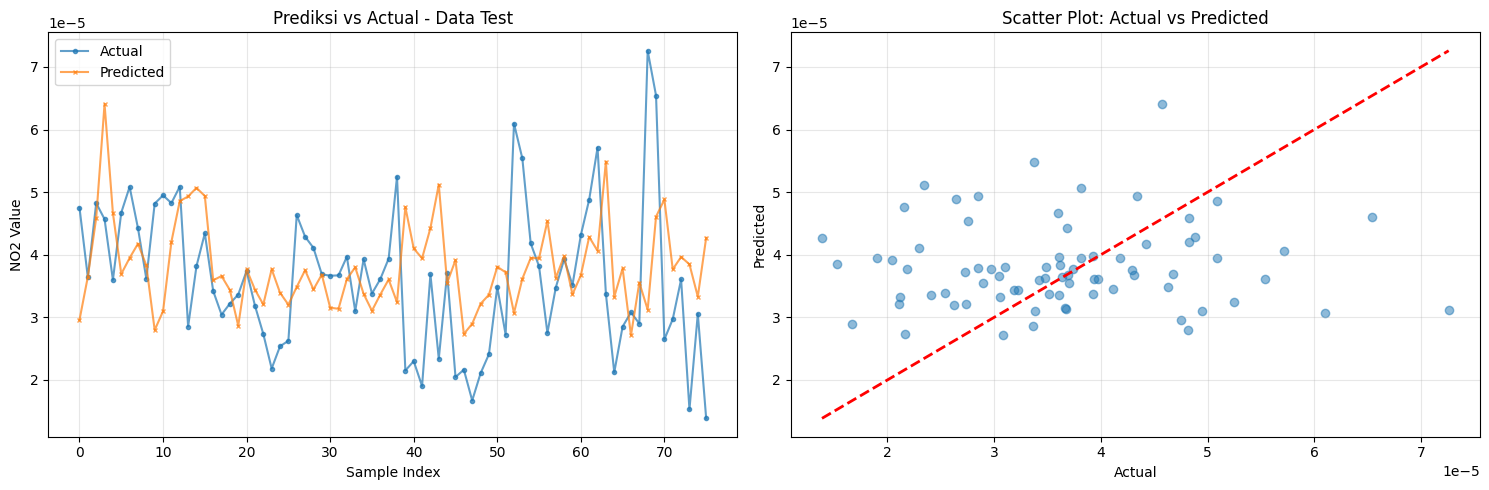

In [12]:
# Plot prediksi vs actual
plt.figure(figsize=(15, 5))

# Plot 1: Prediksi vs Actual pada data test
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label='Actual', marker='o', markersize=3, alpha=0.7)
plt.plot(y_pred, label='Predicted', marker='x', markersize=3, alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('NO2 Value')
plt.title('Prediksi vs Actual - Data Test')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter plot actual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

11. Residual Analysis
Analisis residual (selisih antara nilai aktual dan prediksi) untuk mengevaluasi kualitas model melalui residual plot, histogram distribusi residual, dan Q-Q plot untuk cek normalitas.

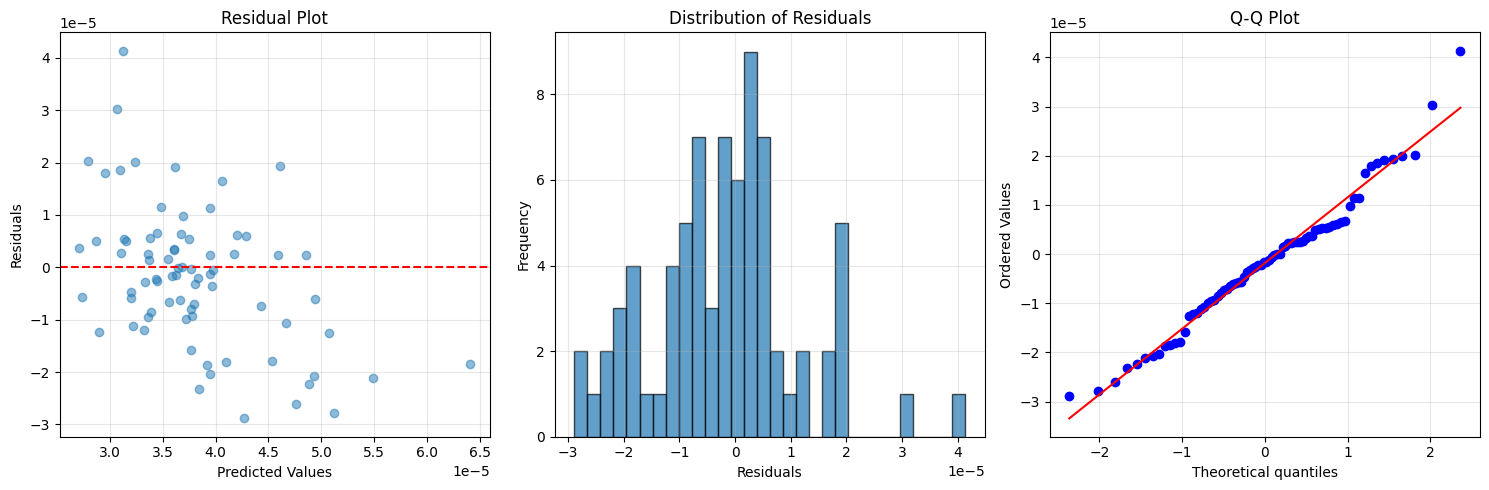

Mean Residual: -0.000002
Std Residual: 0.000013


In [13]:
# Hitung residual
residuals = y_test.values - y_pred

plt.figure(figsize=(15, 5))

# Plot 1: Residual plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 2: Histogram residual
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

# Plot 3: Q-Q plot
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Residual: {residuals.mean():.6f}")
print(f"Std Residual: {residuals.std():.6f}")

12. Hyperparameter Tuning - Mencari K Optimal
Mencari nilai k (jumlah neighbors) optimal dengan mencoba berbagai nilai k dari 1 hingga 20, kemudian membandingkan R² Score pada data training dan testing untuk setiap nilai k.

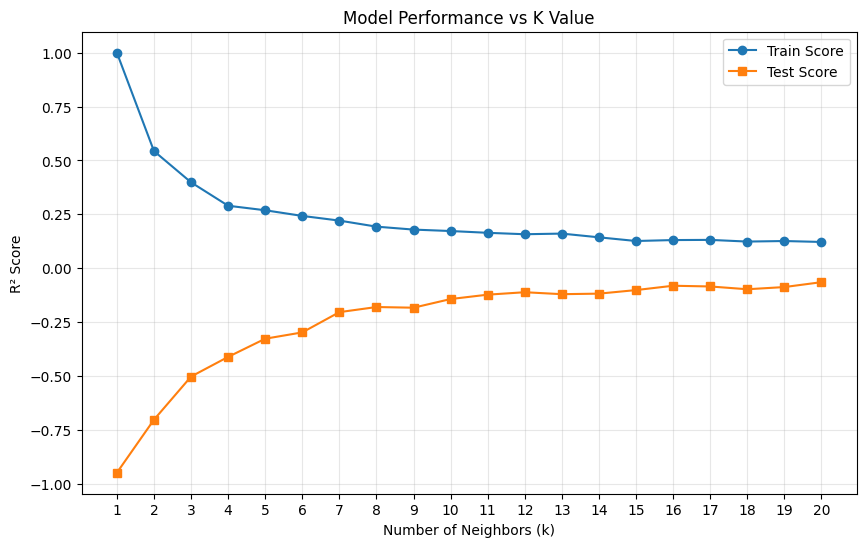


Optimal K: 20
Best Test Score (R²): -0.065045


In [14]:
# Mencari nilai k optimal
k_range = range(1, 21)
train_scores = []
test_scores = []

for k in k_range:
    knn_temp = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn_temp.fit(X_train_scaled, y_train)
    
    # Score pada data train
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    
    # Score pada data test
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Train Score', marker='o')
plt.plot(k_range, test_scores, label='Test Score', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.title('Model Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

# Cari k optimal
optimal_k = k_range[np.argmax(test_scores)]
print(f"\nOptimal K: {optimal_k}")
print(f"Best Test Score (R²): {max(test_scores):.6f}")

13. Training Model dengan K Optimal
Melatih ulang model KNN menggunakan nilai k optimal yang telah ditemukan, kemudian mengevaluasi performanya.

In [15]:
# Training ulang dengan k optimal
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k, weights='uniform')
knn_optimal.fit(X_train_scaled, y_train)

# Prediksi dengan model optimal
y_pred_optimal = knn_optimal.predict(X_test_scaled)
y_train_pred_optimal = knn_optimal.predict(X_train_scaled)

# Evaluasi model optimal
mse_test_opt = mean_squared_error(y_test, y_pred_optimal)
rmse_test_opt = np.sqrt(mse_test_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_optimal)
r2_test_opt = r2_score(y_test, y_pred_optimal)

mse_train_opt = mean_squared_error(y_train, y_train_pred_optimal)
rmse_train_opt = np.sqrt(mse_train_opt)
mae_train_opt = mean_absolute_error(y_train, y_train_pred_optimal)
r2_train_opt = r2_score(y_train, y_train_pred_optimal)

print("="*50)
print(f"MODEL KNN REGRESSION DENGAN K OPTIMAL = {optimal_k}")
print("="*50)
print("\nMetrik pada Data Training:")
print(f"MSE  : {mse_train_opt:.6f}")
print(f"RMSE : {rmse_train_opt:.6f}")
print(f"MAE  : {mae_train_opt:.6f}")
print(f"R²   : {r2_train_opt:.6f}")
print("\nMetrik pada Data Testing:")
print(f"MSE  : {mse_test_opt:.6f}")
print(f"RMSE : {rmse_test_opt:.6f}")
print(f"MAE  : {mae_test_opt:.6f}")
print(f"R²   : {r2_test_opt:.6f}")
print("="*50)

MODEL KNN REGRESSION DENGAN K OPTIMAL = 20

Metrik pada Data Training:
MSE  : 0.000000
RMSE : 0.000011
MAE  : 0.000008
R²   : 0.121638

Metrik pada Data Testing:
MSE  : 0.000000
RMSE : 0.000012
MAE  : 0.000009
R²   : -0.065045


14. Perbandingan Model Default vs Optimal
Membandingkan performa model default (k=5) dengan model optimal untuk melihat peningkatan performa setelah hyperparameter tuning.

In [16]:
# Buat dataframe untuk perbandingan
comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Default (k=5) - Train': [mse_train, rmse_train, mae_train, r2_train],
    'Default (k=5) - Test': [mse_test, rmse_test, mae_test, r2_test],
    f'Optimal (k={optimal_k}) - Train': [mse_train_opt, rmse_train_opt, mae_train_opt, r2_train_opt],
    f'Optimal (k={optimal_k}) - Test': [mse_test_opt, rmse_test_opt, mae_test_opt, r2_test_opt]
})

print("\nPerbandingan Model:")
print(comparison.to_string(index=False))


Perbandingan Model:
Metric  Default (k=5) - Train  Default (k=5) - Test  Optimal (k=20) - Train  Optimal (k=20) - Test
   MSE           1.078581e-10          1.778842e-10            1.295563e-10           1.427163e-10
  RMSE           1.038547e-05          1.333732e-05            1.138228e-05           1.194639e-05
   MAE           8.003434e-06          1.013734e-05            8.398621e-06           9.117820e-06
    R²           2.687464e-01         -3.274917e-01            1.216375e-01          -6.504505e-02


15. Visualisasi Hasil Model Optimal
Visualisasi hasil prediksi model optimal dengan time series plot dan scatter plot untuk mengevaluasi kualitas prediksi secara visual.

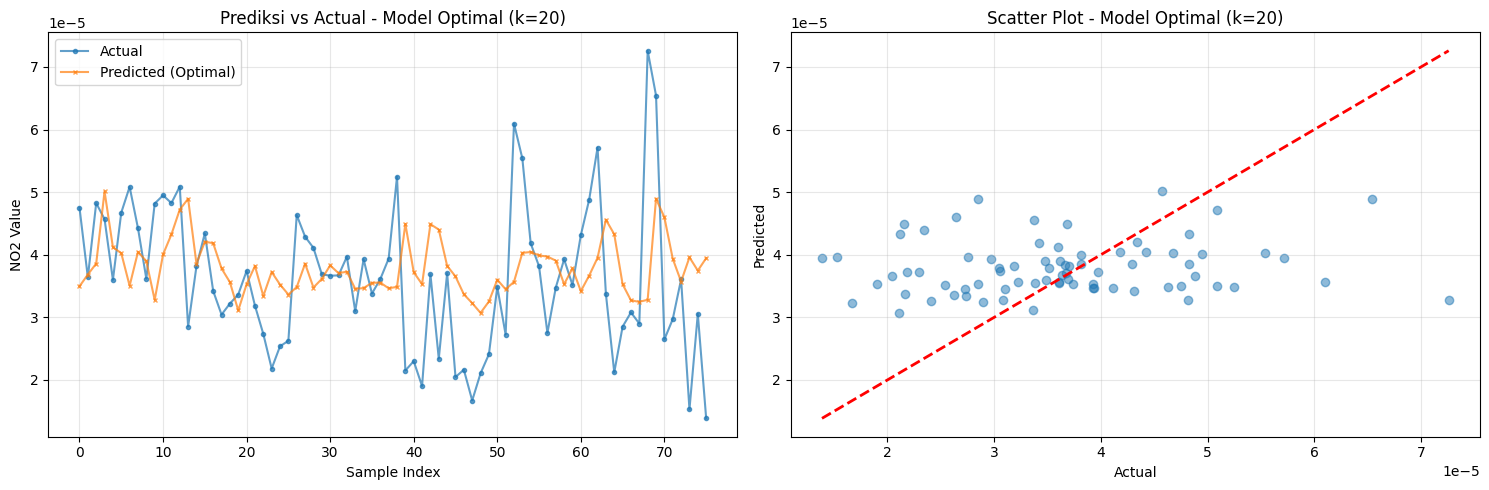

In [17]:
# Plot hasil prediksi model optimal
plt.figure(figsize=(15, 5))

# Plot 1: Time series comparison
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label='Actual', marker='o', markersize=3, alpha=0.7)
plt.plot(y_pred_optimal, label='Predicted (Optimal)', marker='x', markersize=3, alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('NO2 Value')
plt.title(f'Prediksi vs Actual - Model Optimal (k={optimal_k})')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimal, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Scatter Plot - Model Optimal (k={optimal_k})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()